# Create plots for final report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def plot_data(data, ylabel='Daily number of bike riders', legend=True, **kwargs):
    '''
    Plot daily bikerider count by mean day temperature, separate between business days and weekends.

    Parameters
    ----------
    data : pd.DataFrame
        Dataframe with columns 'temperature', 'is_busday' and 'rider_count'.
    ylabel : str
        Label for y-axis.

    Returns
    -------
    (plot)
    '''
    # plot data
    # TODO vielleicht nur outline der Symbole zeichnen? (Dann auf jeden Fall Farbe anpassen: orange sieht man dann fast nicht)
    # TODO use different symbols - such that points for weekend / business day can be distinguished even without color
    # TODO Größe der Symbole anpassen?
    plt.scatter(data[data['is_busday'] == True]['temperature'], data[data['is_busday'] == True]['rider_count'], label='data business day', color='orange', marker='D')
    plt.scatter(data[data['is_busday'] == False]['temperature'], data[data['is_busday'] == False]['rider_count'], label='data weekend', color='blue', marker='o')

    # legend
    plt.xlabel('Average daily temperature [°C]', fontsize=kwargs.get('fontsize_ticks', 14))
    plt.ylabel(ylabel, fontsize=kwargs.get('fontsize_ticks', 14))
    
    if legend:
        plt.legend(fontsize=kwargs.get('fontsize_legend', 14));

In [3]:
def plot_linear_fit(intercept, slope, intercept_business_days, slope_interaction, label_non_busday_fit=None, label_busday_fit=None, alpha=1, is_train=True, legend=True):
    # TODO kommentieren

    # plot fit
    if is_train:
        x_temps = np.linspace(-7, 25, 10)
    else:
        x_temps = np.linspace(-8, 27.5, 10)
    plt.plot(x_temps, intercept + intercept_business_days +  x_temps * (slope + slope_interaction), label=label_busday_fit, color='orange', alpha=alpha)
    plt.plot(x_temps, intercept +  x_temps * slope, label=label_non_busday_fit, color='blue', alpha=alpha);

    if legend:
        plt.legend();

## Data with prediction intervals / prediction limits

In [4]:
# plot prediction intervals limits together with datapoints
def plot_data_with_pred_limits(dat, ylabel=None, plot_limits=False, export_filename=None, legend=False, legend_outside=False):
    '''
    Plot prediction intervals together with datapoints.

    Parameters
    ----------
    dat : pd.DataFrame
        Dataframe with columns 'temperature', 'is_busday', 'rider_count', 'mean_predicted_rider_count', '2-5-quant' and '97-5-quant'
    plot_limits : bool
        Indicates whether to plot prediction interval limits or the whole interval.
    ylabel : str
        Label for y-axis.

    Returns
    -------
    (plot)
    '''
    # initialize figure
    plt.figure()

    # plot data
    if (ylabel is not None):
        plot_data(dat, ylabel=ylabel, legend=legend)
    else:
        plot_data(dat, legend=legend)


    # indices of business days / non-business days
    busday_indices = dat[dat['is_busday']].index
    nonbusday_indices = dat[~dat['is_busday']].index

    # plot 95% prediction intervals
    if(plot_limits): # plot limits of prediction interval
        plt.plot(
            dat.loc[busday_indices]['temperature'],
            dat.loc[busday_indices]['2-5-quant'],
            '--',
            color='orange',
            alpha=0.5,
            label='95% prediction limits business day'
        )
        plt.plot(
            dat.loc[busday_indices]['temperature'],
            dat.loc[busday_indices]['97-5-quant'],
            '--',
            color='orange',
            alpha=0.5,
        )

        plt.plot(
            dat.loc[nonbusday_indices]['temperature'],
            dat.loc[nonbusday_indices]['2-5-quant'],
            '--',
            color='blue',
            alpha=0.5,
            label='95% prediction limits weekend'
        )
        plt.plot(
            dat.loc[nonbusday_indices]['temperature'],
            dat.loc[nonbusday_indices]['97-5-quant'],
            '--',
            color='blue',
            alpha=0.5,
        )
    else:
        plt.vlines(x=dat.loc[busday_indices]['temperature'], ymin=dat.loc[busday_indices]['2-5-quant'], ymax=dat.loc[busday_indices]['97-5-quant'], color='orange', alpha=0.3, label='95% prediction interval business day')
        plt.vlines(x=dat.loc[nonbusday_indices]['temperature'], ymin=dat.loc[nonbusday_indices]['2-5-quant'], ymax=dat.loc[nonbusday_indices]['97-5-quant'], color='blue', alpha=0.3, label='95% prediction interval weekend')

    if legend:
        ax = plt.gca()
        lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) if legend_outside else ax.legend()
        
    if export_filename is not None:
        plt.savefig(export_filename, bbox_extra_artists=(lgd,) if legend else None, bbox_inches='tight') 

### Training data with prediction intervals / prediction limits

In [5]:
# import data
training_data_with_prediction_intervals = pd.read_pickle('./../data/results/training_data_prediction_characteristics.pkl')

# sort it by temperature
training_data_with_prediction_intervals.sort_values(by=['temperature'], inplace=True)

training_data_with_prediction_intervals

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
40,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-11,-6.9,True,627,1515.517978,-340.077502,3378.977454
39,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-10,-6.4,True,774,1577.676549,-283.809562,3419.396642
41,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-12,-5.8,True,1025,1647.159712,-208.295526,3503.364862
15,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-01-16,-5.6,False,421,737.018122,-796.754267,2286.374443
42,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-13,-5.2,False,1221,780.797509,-756.873647,2309.283541
...,...,...,...,...,...,...,...,...,...,...,...,...
217,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-08-13,23.3,True,4408,5349.968138,3477.407264,7220.573015
218,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-08-14,23.4,False,3280,3729.292166,2208.158153,5272.210612
163,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-06-18,24.2,True,5867,5472.135085,3609.345064,7328.205683
164,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-06-19,24.4,False,4294,3839.857996,2306.050485,5368.078807


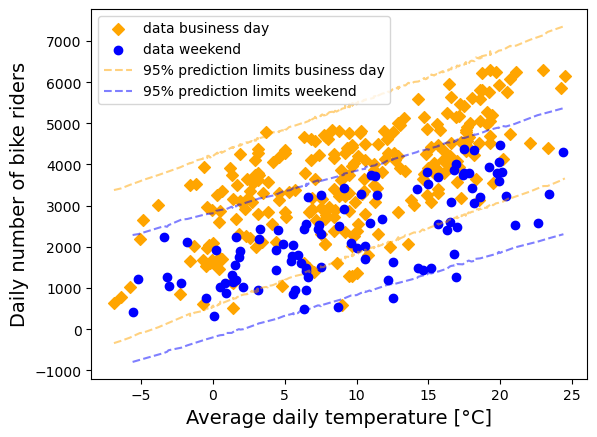

In [6]:
# different visualizations of prediction intervals
plot_data_with_pred_limits(training_data_with_prediction_intervals, plot_limits=True, export_filename='training_data_with_prediction_intervals.pdf', legend=True)

In [7]:
# import data for prediction intervals over whole temperature range
prediction_intervals_over_whole_temp_range = pd.read_pickle('./../data/results/plotting_dat_prediction_characteristics.pkl')

# import characteristics of the posterior distributions of the parameters
posterior_distribution_characteristics = pd.read_pickle('./../data/results/posterior_distribution_characteristics.pkl')

### Test data with prediction intervals / prediction limits

In [8]:
# import data
test_data_with_prediction_intervals = pd.read_pickle('./../data/results/test_data_prediction_characteristics.pkl')

# sort it by temperature
test_data_with_prediction_intervals.sort_values(by=['temperature'], inplace=True)

test_data_with_prediction_intervals

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
48541,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-12,-7.6,True,54,1441.437569,-419.239133,3320.671721
48540,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-11,-7.5,True,36,1442.525793,-399.549413,3289.653377
48539,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-10,-6.9,True,36,1514.458129,-354.757548,3342.958339
48542,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-13,-6.6,False,37,628.667799,-904.487530,2183.836665
48538,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-09,-3.7,True,86,1913.321516,79.608785,3760.062105
...,...,...,...,...,...,...,...,...,...,...,...,...
48718,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-08-14,24.2,False,251,3823.699761,2307.318042,5363.124553
48661,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-16,24.5,True,533,5501.044534,3645.468373,7353.561144
48662,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-17,26.0,True,527,5696.886389,3835.162968,7543.912690
48663,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-18,26.7,True,466,5781.886210,3936.230667,7625.685368


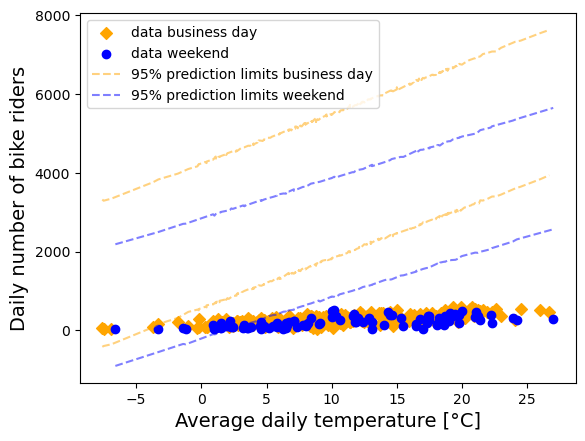

In [9]:
# different visualizations of prediction intervals
plot_data_with_pred_limits(test_data_with_prediction_intervals, plot_limits=True, legend=True, export_filename='test_data_with_prediction_intervals.pdf')

### Normalized test data with prediction intervals / prediction limits

In [11]:
# import data
normalized_test_data_with_prediction_intervals = pd.read_pickle('./../data/results/normalized_test_data_prediction_characteristics.pkl')

# sort it by temperature
normalized_test_data_with_prediction_intervals.sort_values(by=['temperature'], inplace=True)

normalized_test_data_with_prediction_intervals

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
48541,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-12,-7.6,True,0.053633,0.185538,-0.130721,0.500154
48540,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-11,-7.5,True,0.022491,0.186377,-0.129967,0.499952
48539,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-10,-6.9,True,0.022491,0.197886,-0.108538,0.510688
48542,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-13,-6.6,False,0.024221,0.050930,-0.218100,0.320094
48538,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-02-09,-3.7,True,0.108997,0.267555,-0.051237,0.578935
...,...,...,...,...,...,...,...,...,...,...,...,...
48718,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-08-14,24.2,False,0.394464,0.584881,0.318545,0.854487
48661,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-16,24.5,True,0.882353,0.866239,0.551701,1.179188
48662,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-17,26.0,True,0.871972,0.899371,0.582541,1.210651
48663,Stadt Ludwigsburg,Solitudeallee,Solitudeallee Stadteinwärts,9.182725,48.883563,2021-06-18,26.7,True,0.766436,0.912834,0.594671,1.230559


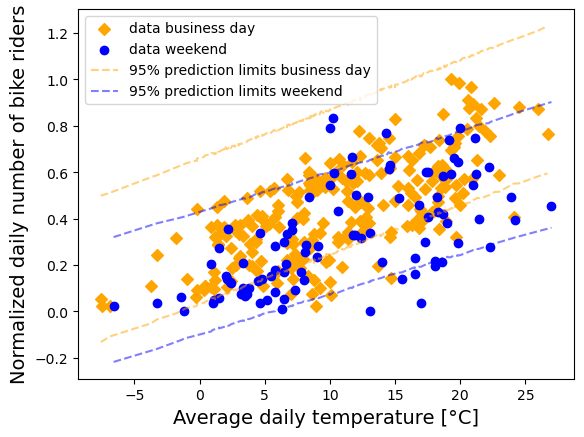

In [12]:
# different visualizations of prediction intervals
plot_data_with_pred_limits(normalized_test_data_with_prediction_intervals, 'Normalized daily number of bike riders', plot_limits=True, export_filename='normalized_test_data_with_prediction_intervals.pdf', legend=True)

In [13]:
# import data for prediction intervals over whole temperature range
prediction_intervals_over_whole_temp_range_for_normalized = pd.read_pickle('./../data/results/plotting_dat_prediction_characteristics_for_normalized.pkl')

# import characteristics of the posterior distributions of the parameters
posterior_distribution_characteristics_for_normalized = pd.read_pickle('./../data/results/posterior_distribution_characteristics_for_normalized.pkl')

## Data with mean posterior and credible intervals

In [14]:
# import characteristics of the posterior distributions of the parameters
posterior_distribution_characteristics = pd.read_pickle('./../data/results/posterior_distribution_characteristics.pkl')
posterior_distribution_characteristics

,param_name,mean,95-hdi-lower,95-hdi-upper
0,beta_0_intercept_weekend,1315.064268,1062.772782,1561.759184
1,beta_1_slope_weekend,103.435080,82.462665,123.351787
2,beta_2_additional_intercept_business_day,1076.409959,775.133152,1405.074450
3,beta_3_additional_slope_business_day,23.470349,-2.150213,50.031843
4,intercept_business_day,2391.474227,2199.445323,2594.748324
5,slope_business_day,126.905430,109.857040,143.355290


TODO Kann vermutlich nicht einfach jeweils lower und upper HDI limits nehmen, um credible intervals zu plotten, richtig? Denn vielleicht z.B. korreliert...

In [15]:
# import samples from the posterior distributions for all paramters
# (one row represents parameters of one regression line)
params_posterior_distribution = pd.read_pickle('./../data/results/samples_from_parameter_posterior_distributions.pkl')
params_posterior_distribution

,beta_0_intercept_weekend,beta_1_slope_weekend,beta_2_additional_intercept_business_day,beta_3_additional_slope_business_day
0,1195.717599,103.583178,1298.452379,10.525081
1,1163.659683,104.277524,1486.997285,9.672530
2,1178.521989,110.155283,1358.543989,2.021595
3,1565.014128,79.134640,811.619500,54.472246
4,1427.781190,91.064916,860.956534,45.974391
...,...,...,...,...
19995,1334.332676,104.534593,1098.213954,19.709280
19996,1318.208942,101.479295,997.650356,28.268149
19997,1273.388905,102.967838,1218.525657,15.726154
19998,1263.245795,104.824906,1165.020881,15.855544


TODO
Either sample randomly 40 (TODO adjust number) parameter configurations (that is: rows) from 'params_posterior_distribution' and plot those credible regression lines  
or  
take 95%-interval for all mean predictions and plot area

### Plot data with mean posterior and example regression lines

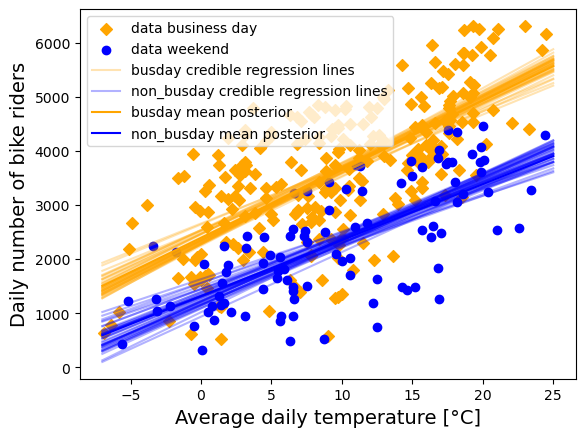

In [16]:
# plot data
plot_data(training_data_with_prediction_intervals)

# plot some credible regression lines as examples

num_posts_to_plot = 40 # number of credible regression lines

# draw random indices (--> random examples)
rand_indices = np.random.choice(a=len(params_posterior_distribution), size=num_posts_to_plot, replace=False)

# plot example credible regression lines
for i, idx in enumerate(rand_indices):

    if (i == 0): # add label for first plotted posterior
        plot_linear_fit(
            params_posterior_distribution.iloc[idx]['beta_0_intercept_weekend'],
            params_posterior_distribution.iloc[idx]['beta_1_slope_weekend'],
            params_posterior_distribution.iloc[idx]['beta_2_additional_intercept_business_day'],
            params_posterior_distribution.iloc[idx]['beta_3_additional_slope_business_day'],
            'non_busday credible regression lines', # TODO adjust label
            'busday credible regression lines',
            alpha=0.3)
    else:
        # TODO adjust alpha
        plot_linear_fit(
            params_posterior_distribution.iloc[idx]['beta_0_intercept_weekend'],
            params_posterior_distribution.iloc[idx]['beta_1_slope_weekend'],
            params_posterior_distribution.iloc[idx]['beta_2_additional_intercept_business_day'],
            params_posterior_distribution.iloc[idx]['beta_3_additional_slope_business_day'],
            alpha=0.3)
    
# plot mean posterior prediction
plot_linear_fit(
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
    label_busday_fit='busday mean posterior',
    label_non_busday_fit='non_busday mean posterior'
    )

### Plot data with mean posterior and credible intervals

In [17]:
# compute the limits of the 95% credible interval

# initialize dataframe that contains the limits of the credible interval
df_credible_interval = pd.DataFrame(columns=['temp', 'is_busday', '95-hdi-lower', '95-hdi-upper'])

x_temps = np.linspace(-7, 25, 100) # TODO use same range as for mean posteriors

# for a range of temperature values, check mean predictions of each regression line sampled from posterior
for x in x_temps:

    # mean predictions on weekends (i.e., point on one of the 20000 regression lines)
    mean_preds = params_posterior_distribution['beta_0_intercept_weekend'] + params_posterior_distribution['beta_1_slope_weekend'] * x
    
    # quantiles of mean predictions
    hdi_lower, hdi_upper = np.quantile(mean_preds, [0.025, 0.975])

    # summarize in dataframe
    part_df = pd.DataFrame({'temp': x, 'is_busday': 0, '95-hdi-lower': hdi_lower, '95-hdi-upper': hdi_upper}, index=[0])

    # append to overall dataframe
    df_credible_interval = pd.concat([df_credible_interval, part_df], ignore_index = True)


    # mean predictions on business days (i.e., point on one of the 20000 regression lines)
    mean_preds = params_posterior_distribution['beta_0_intercept_weekend'] + params_posterior_distribution['beta_2_additional_intercept_business_day'] + (params_posterior_distribution['beta_1_slope_weekend'] + params_posterior_distribution['beta_3_additional_slope_business_day']) * x
    
    # quantiles of mean predictions
    hdi_lower, hdi_upper = np.quantile(mean_preds, [0.025, 0.975])

    # summarize in dataframe
    part_df = pd.DataFrame({'temp': x, 'is_busday': 1, '95-hdi-lower': hdi_lower, '95-hdi-upper': hdi_upper}, index=[0])

    # append to overall dataframe
    df_credible_interval = pd.concat([df_credible_interval, part_df], ignore_index = True)

df_credible_interval

,temp,is_busday,95-hdi-lower,95-hdi-upper
0,-7.000000,0,212.558048,963.491419
1,-7.000000,1,1205.036466,1810.579722
2,-6.676768,0,252.182722,991.156013
3,-6.676768,1,1250.853639,1846.660193
4,-6.353535,0,291.444411,1018.641803
...,...,...,...,...
195,24.353535,1,5206.831428,5755.304670
196,24.676768,0,3524.632942,4202.824304
197,24.676768,1,5242.089412,5800.771043
198,25.000000,0,3552.483947,4241.762819


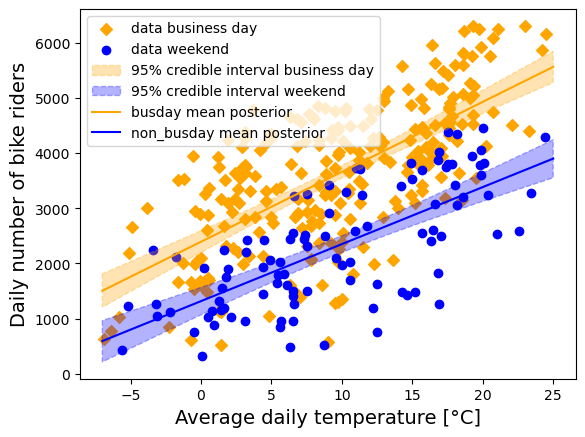

In [18]:
# plot data
plot_data(training_data_with_prediction_intervals)

# plot 95% credible interval
# TODO adjust label: "95% credible interval..." Vielleicht auch Unterscheidung, business day/weekend?
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-upper'].values,
    color='orange', linestyle='--', alpha=0.3, label='95% credible interval business day')
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-upper'].values,
    color='blue', linestyle='--', alpha=0.3, label='95% credible interval weekend')
# TODO set colors for business days / weekend globally to not exchange them inadvertently in between cells

# plot mean posterior prediction
plot_linear_fit(
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
    label_busday_fit='busday mean posterior',
    label_non_busday_fit='non_busday mean posterior'
    )

In [19]:
training_data_with_prediction_intervals.head()

,standort,counter_site,channel_name,longitude,latitude,date,temperature,is_busday,rider_count,mean_predicted_rider_count,2-5-quant,97-5-quant
40,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-11,-6.9,True,627,1515.517978,-340.077502,3378.977454
39,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-10,-6.4,True,774,1577.676549,-283.809562,3419.396642
41,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-12,-5.8,True,1025,1647.159712,-208.295526,3503.364862
15,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-01-16,-5.6,False,421,737.018122,-796.754267,2286.374443
42,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,7.862301,47.99054,2021-02-13,-5.2,False,1221,780.797509,-756.873647,2309.283541


In [20]:
import seaborn as sns

In [21]:
sns.set_style("whitegrid")

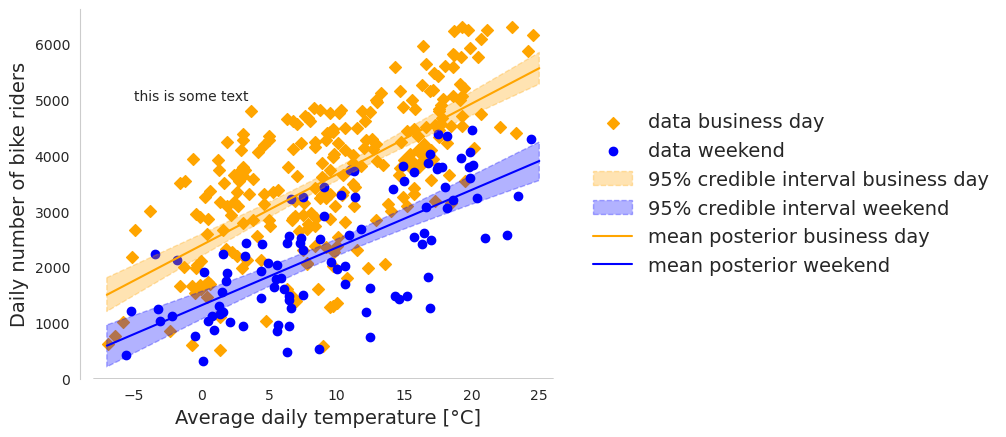

In [22]:
kwargs = {
    'fontsize_ticks' : 14,
    'fontsize_legend' : 14
}

# plot data
plot_data(training_data_with_prediction_intervals, **kwargs)

# plot 95% credible interval
# TODO adjust label: "95% credible interval..." Vielleicht auch Unterscheidung, business day/weekend?
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==1]['95-hdi-upper'].values,
    color='orange', linestyle='--', alpha=0.3, label='95% credible interval business day')
plt.fill_between(
    x_temps,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-lower'].values,
    df_credible_interval[df_credible_interval['is_busday']==0]['95-hdi-upper'].values,
    color='blue', linestyle='--', alpha=0.3, label='95% credible interval weekend')
# TODO set colors for business days / weekend globally to not exchange them inadvertently in between cells

# plot mean posterior prediction
plot_linear_fit(
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
    posterior_distribution_characteristics.loc[posterior_distribution_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
    label_busday_fit='mean posterior business day',
    label_non_busday_fit='mean posterior weekend'
    )


#sns.despine(bottom = True, left = True)
sns.despine(bottom = True)
#sns.despine()

# manual "x-axis"
plt.plot([-8,26], [0,0], color='black', linewidth = 1)
plt.xlim(-9)

# manual "y-axis"
#plt.plot([-9,-9], [0,6400], color='grey', linewidth = 0.8)

# start y-axis at 0
plt.ylim(0)

ax = plt.gca()
ax.grid(False)
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=14)
plt.text(x=-5, y=5000, s='this is some text')
plt.savefig('training_data_with_credible_intervals.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')  
plt.show()


## Abstract function

In [23]:
# plot prediction intervals together with datapoints
def plot_data_with_intervals(dat_datapoints, dat_intervals, post_dist_characteristics, is_cred, is_trainset, ylabel=None, export_filename=None, legend=False, legend_outside=False):
    '''
    Plot prediction intervals together with datapoints.

    Parameters
    ----------
    dat_datapoints : pd.DataFrame
        Dataframe with columns 'temperature', 'is_busday', 'rider_count'.
    dat_intervals : pd.DataFrame
        Dataframe with columns 'temperature', 'is_busday', 'mean_predicted_rider_count', '2-5-quant' and '97-5-quant' or
        Dataframe with columns 'temperature', 'is_busday', '95-hdi-lower' and '95-hdi-upper'.
    post_dist_characteristics : pd.DataFrame
        Dataframe with columns 'param_name', and 'mean'.
    is_cred : bool
        indicates whether to plot credible (True) or prediction (False) intervals
    is_trainset : bool
        indicates whether to training set (True) or test set (False) is plotted
    ylabel : str
        Label for y-axis.

    Returns
    -------
    (plot)
    '''
    sns.set_style("whitegrid")

    # initialize figure
    #plt.figure()

    # plot data
    if (ylabel is not None):
        plot_data(dat_datapoints, ylabel=ylabel, legend=legend)
    else:
        plot_data(dat_datapoints, legend=legend)


    # plot intervals: either 95% prediction intervals or 95% credible intervals
    if (is_cred):
        temp_str = 'temp'
        lower_str = '95-hdi-lower'
        upper_str = '95-hdi-upper'
        busday_label = '95% credible interval business day'
        weekend_label = '95% credible interval weekend'
        busday_indices = dat_intervals[dat_intervals['is_busday'] == 1].index
        nonbusday_indices = dat_intervals[dat_intervals['is_busday'] == 0].index
    else:
        temp_str = 'temperature'
        lower_str = '2-5-quant'
        upper_str = '97-5-quant'
        busday_label = '95% prediction interval business day'
        weekend_label = '95% prediction interval weekend'
        busday_indices = dat_intervals[dat_intervals['is_busday']].index
        nonbusday_indices = dat_intervals[~dat_intervals['is_busday']].index
        
    plt.fill_between(
        dat_intervals.loc[busday_indices][temp_str],
        dat_intervals.loc[busday_indices][lower_str].values,
        dat_intervals.loc[busday_indices][upper_str].values,
        color='orange', linestyle='--', alpha=0.3, label=busday_label)
    plt.fill_between(
        dat_intervals.loc[nonbusday_indices][temp_str],
        dat_intervals.loc[nonbusday_indices][lower_str].values,
        dat_intervals.loc[nonbusday_indices][upper_str].values,
        color='blue', linestyle='--', alpha=0.3, label=weekend_label)
    # TODO set colors for business days / weekend globally to not exchange them inadvertently in between cells

    
    # plot mean posterior prediction
    plot_linear_fit(
        post_dist_characteristics.loc[post_dist_characteristics['param_name'] == 'beta_0_intercept_weekend']['mean'].values[0],
        post_dist_characteristics.loc[post_dist_characteristics['param_name'] == 'beta_1_slope_weekend']['mean'].values[0],
        post_dist_characteristics.loc[post_dist_characteristics['param_name'] == 'beta_2_additional_intercept_business_day']['mean'].values[0],
        post_dist_characteristics.loc[post_dist_characteristics['param_name'] == 'beta_3_additional_slope_business_day']['mean'].values[0],
        label_busday_fit='mean posterior business day',
        label_non_busday_fit='mean posterior weekend',
        is_train=is_trainset,
        legend=False
        )


    ax = plt.gca()
    ax.grid(False)

    if legend:
        if legend_outside:
            lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=14)
        else:
            lgd = ax.legend()


    manual_axis = False # TODO
    if (manual_axis):
        #sns.despine(bottom = True, left = True)
        sns.despine(bottom = True)

        # manual "x-axis"
        plt.plot([-8,26], [0,0], color='black', linewidth = 1) # TODO adjust upper limit... for training data 26, for test data higher
        plt.xlim(-9)

        # manual "y-axis"
        #plt.plot([-9,-9], [0,6400], color='grey', linewidth = 0.8)

        # start y-axis at 0
        plt.ylim(0)

    else:
        sns.despine()

        # adjust x-range according to plotted data
        if(is_trainset):
            plt.xlim(-7,25)
            plt.ylim(0) # TODO eigentlich sinnvoll, denn bike rider counts >=0, aber sieht für test set nicht gut aus...
        else:
            plt.xlim(-8,27.5)
        
    if export_filename is not None:
        if legend:
            my_bbox_extra_artists=(lgd,)
        else:
            my_bbox_extra_artists=None
        plt.savefig(export_filename, bbox_extra_artists=my_bbox_extra_artists, bbox_inches='tight')

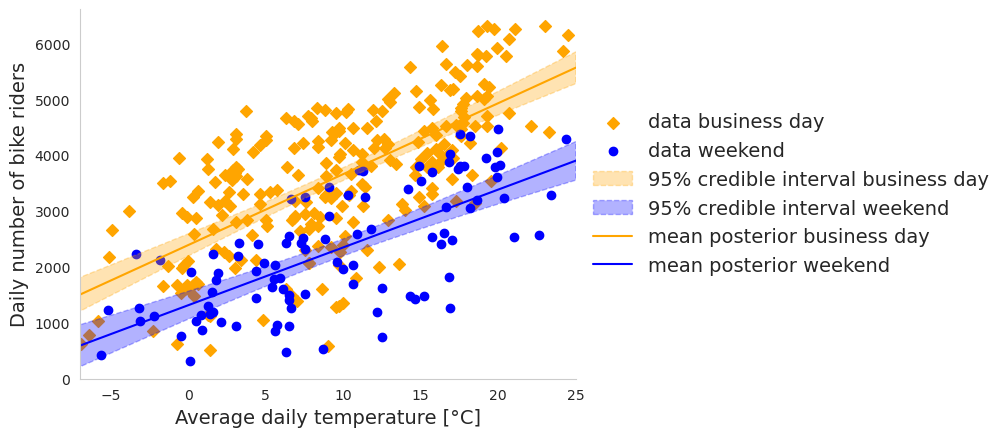

In [24]:
plot_data_with_intervals(
    training_data_with_prediction_intervals,
    df_credible_interval,
    posterior_distribution_characteristics,
    is_cred=True,
    export_filename='training_data_with_credible_intervals.pdf',
    legend=True,
    legend_outside=True,
    is_trainset=True)

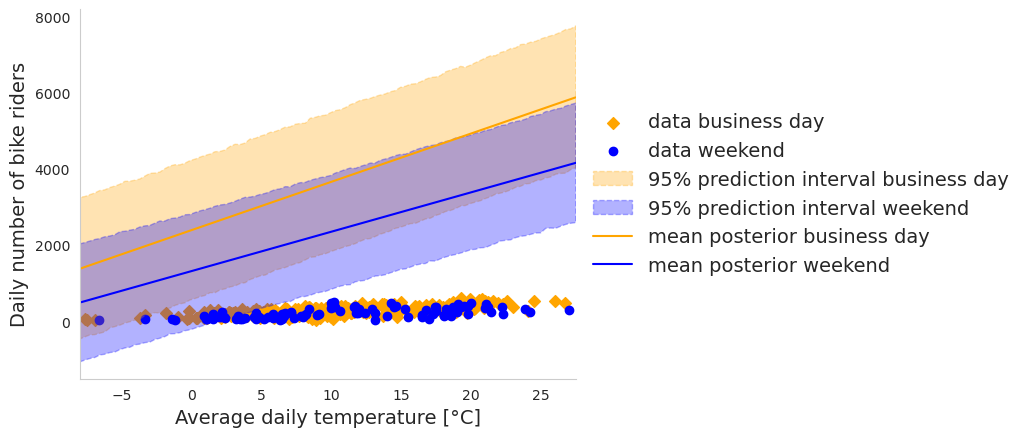

In [25]:
# TODO test whether the function also works for prediction intervals
plot_data_with_intervals(
    test_data_with_prediction_intervals,
    prediction_intervals_over_whole_temp_range,
    posterior_distribution_characteristics,
    is_cred=False,
    export_filename='test_data_with_prediction_intervals.pdf',
    legend=True,
    legend_outside=True,
    is_trainset=False)

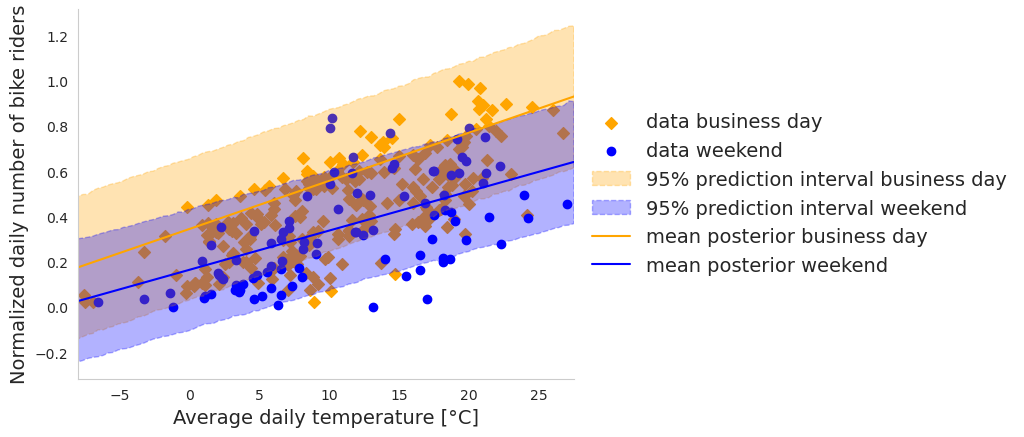

In [26]:
# TODO test whether the function also works for prediction intervals
plot_data_with_intervals(
    normalized_test_data_with_prediction_intervals,
    prediction_intervals_over_whole_temp_range_for_normalized,
    posterior_distribution_characteristics_for_normalized,
    is_cred=False,
    ylabel='Normalized daily number of bike riders',
    export_filename='normalized_test_data_with_prediction_intervals.pdf',
    legend=True,
    legend_outside=True,
    is_trainset=False)

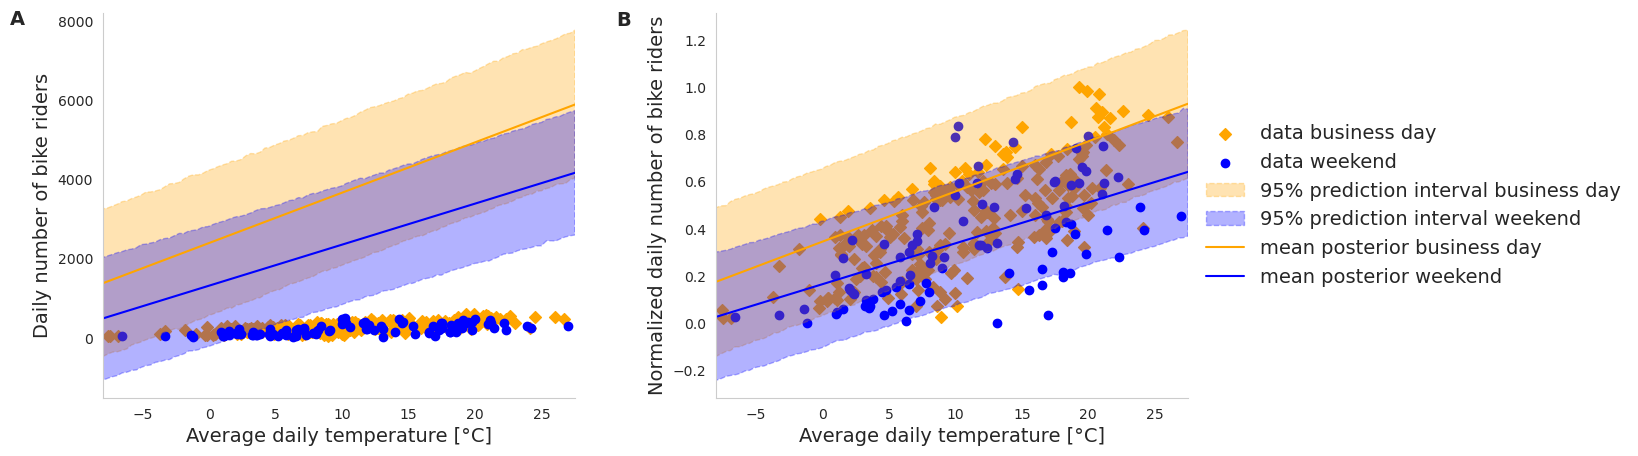

In [27]:
# initialize figure
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_data_with_intervals(
    test_data_with_prediction_intervals,
    prediction_intervals_over_whole_temp_range,
    posterior_distribution_characteristics,
    is_cred=False,
    legend=False,
    is_trainset=False)
plt.text(x=-15, y=7900, s='A', weight='bold', fontsize=14)

plt.subplot(1, 2, 2)
plot_data_with_intervals(
    normalized_test_data_with_prediction_intervals,
    prediction_intervals_over_whole_temp_range_for_normalized,
    posterior_distribution_characteristics_for_normalized,
    is_cred=False,
    ylabel='Normalized daily number of bike riders',
    legend=True,
    legend_outside=True,
    is_trainset=False)
plt.text(x=-15.5, y=1.26, s='B', weight='bold', fontsize=14);

plt.subplots_adjust(wspace=0.3) # horizontal spacing

# TODO export
plt.savefig('normalized_and_nonnormalized_test_data_with_prediction_intervals.pdf', bbox_inches='tight')
# TODO maybe adjust y-axis because bike riders >=0